## Exploratory Data Analysis (EDA) on the Titanic dataset

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [ ]:
# loading data
df = pd.read_csv('titanic.csv')

Explore

In [7]:
# examining the basic characteristics of the dataset:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handling Missing Values

In [10]:
print(df.isna().sum())
print(f'total nomber of null values = {df.isna().sum().sum()}')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
total nomber of null values = 866


In [11]:
print(len(df))

891


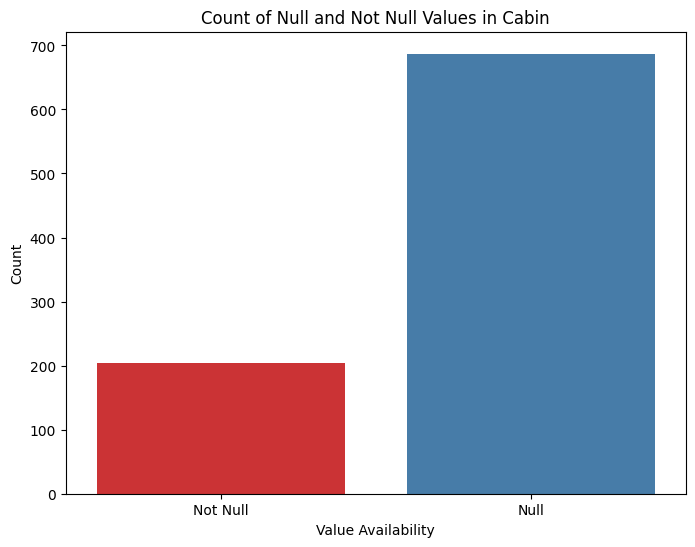

In [12]:


column_name = 'Cabin'

null_mask = df[column_name].isnull()

# Creating a countplot to visualize the counts of null and non-null values
plt.figure(figsize=(8, 6))
sns.countplot(x=null_mask, palette='Set1')

# Adding labels and a title
plt.xlabel('Value Availability')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Null', 'Null'])
plt.title(f'Count of Null and Not Null Values in {column_name}')

# Show the plot
plt.show()


"Before dropping the 'Cabin' column from the dataset, it's important to assess whether there is a strong relationship or correlation between this column and the 'Survived' column

In [13]:


contingency_table = pd.crosstab(df['Survived'], df['Cabin'])

chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("P-value:", p)

Chi-squared test statistic: 161.25
P-value: 0.18357354976388165


In [14]:
# hear the p-value is greater than a chosen significance level (0.05) so we conclude that there is no
# significant relationship between the 'Cabin' and 'Survived' columns

# now we can remove the cabin column
df.drop(['Cabin'],axis=1,inplace=True)

In [15]:
#  hear we checking whether there is a statistically significant relationship between the "Embarked" and "Survived"
#   columns in the Titanic dataset before making any decisions to drop the column

In [16]:
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("P-value:", p)

Chi-squared test statistic: 26.48914983923762
P-value: 1.769922284120912e-06


In [17]:
# this time also p-value is greater than chosen significance level, we would fail to reject the null hypothesis,
# indicating no statistically significant association
# now we can drop the column

In [18]:
df.drop('Embarked', inplace=True,axis=1)

In [19]:
# now we have to fill null values in the age column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [20]:
if df.isna().sum().sum()==0:
  print('the data is clear there is no null values')
else:
  print('still there is null values in the data ')

the data is clear there is no null values


### Create visualizations to gain insights into the data

<ipython-input-21-49c0c47f12ac>:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1, 1])


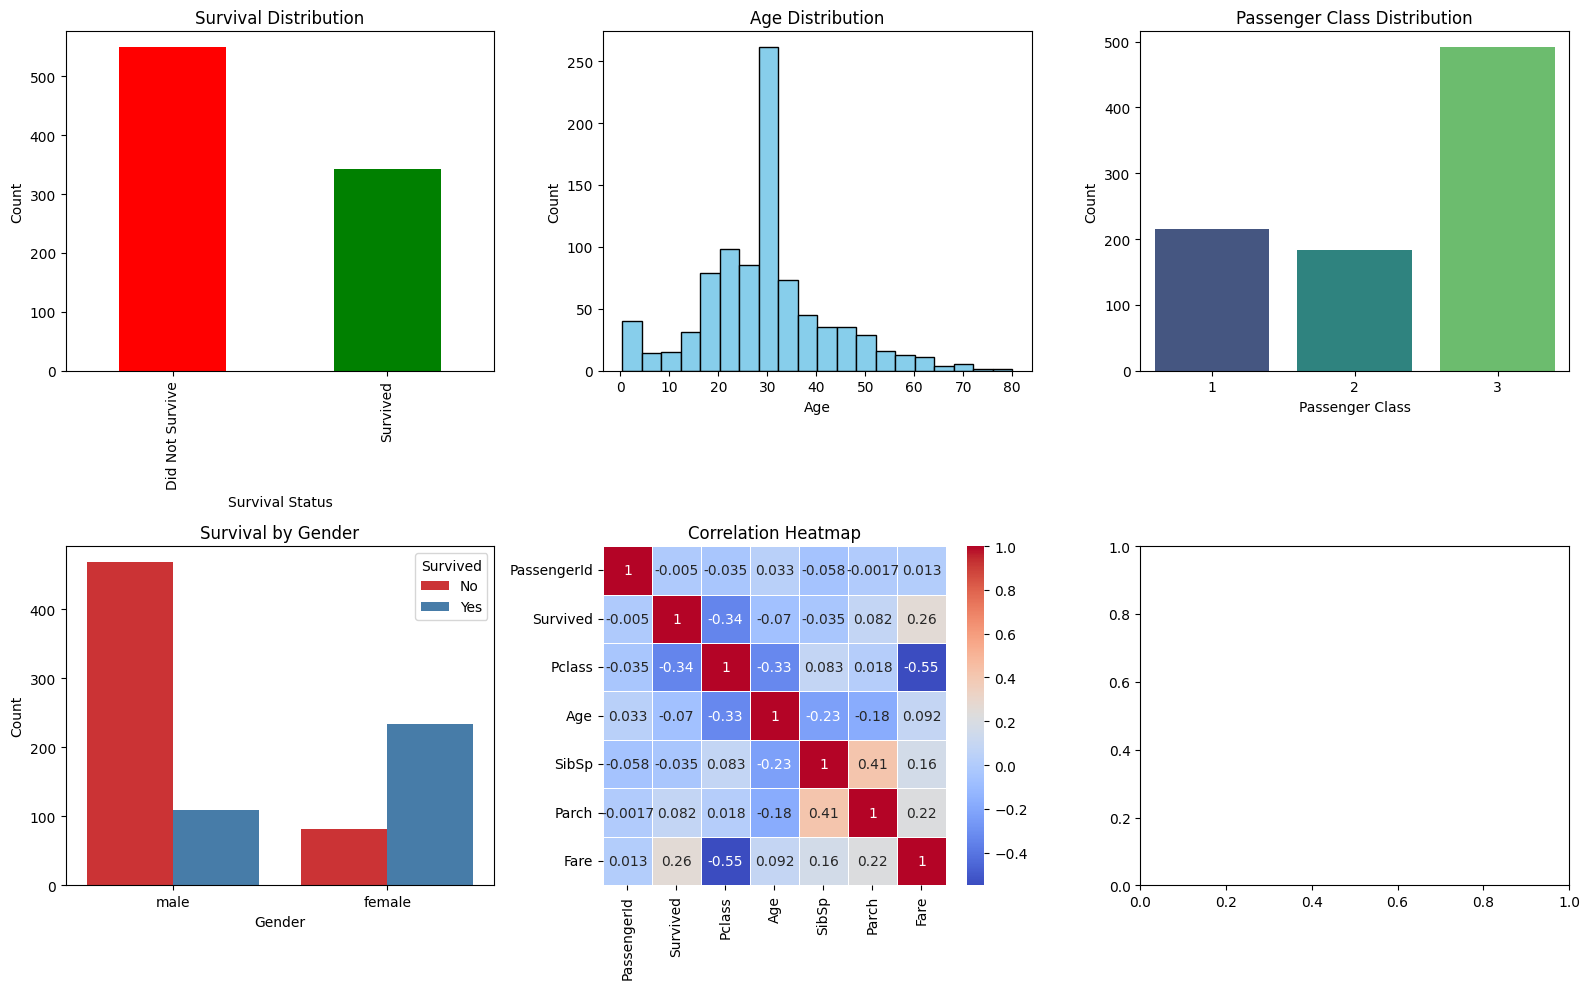

In [21]:

# Creating a single figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Subplot 1: Survival Distribution
df['Survived'].value_counts().plot(kind='bar', color=['red', 'green'], ax=axes[0, 0])
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Did Not Survive', 'Survived'])
axes[0, 0].set_xlabel('Survival Status')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Survival Distribution')

# Subplot 2: Age Distribution
df['Age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Age Distribution')

# Subplot 3: Passenger Class Distribution
sns.countplot(data=df, x='Pclass', palette='viridis', ax=axes[0, 2])
axes[0, 2].set_xlabel('Passenger Class')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Passenger Class Distribution')

# Subplot 4: Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Survival by Gender')
axes[1, 0].legend(title='Survived', labels=['No', 'Yes'])

# Subplot 5: Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')


# Adjusting layout and display
plt.tight_layout()
plt.show()

## outlires dettection

In [22]:
# Calculat ing IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 2.4 * IQR
upper_bound = Q3 + 2.5 * IQR

# Identify outliers in age column
outliers_iqr = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Print outliers
print("Outliers (IQR):")
outliers_iqr


Outliers (IQR):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750


In [23]:
#the above dataframe we can see there is no outlire in the dataset

In [24]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 9 * IQR
upper_bound = Q3 + 9 * IQR

# Identify outliers in Fare column
outliers_iqr = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

# Print outliers
print("Outliers (IQR):")
outliers_iqr

Outliers (IQR):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292


In [25]:
#the above dataframe we can see there is no outlire in the dataset

## Hypothesis
Hypothesis Test 1:

In [26]:
"""Null Hypothesis (H0): There is no relationship between "Pclass" and "Survived."

Alternative Hypothesis (H1): There is a relationship between "Pclass" and "Survived." """

contingency_table = pd.crosstab(df['Pclass'], df['Survived'])

chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

print("Chi-squared test statistic:", chi2)
print("P-value:", p)

# Check if the p-value is less than alpha
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between passenger class and survival.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between passenger class and survival.")


Chi-squared test statistic: 102.88898875696056
P-value: 4.549251711298793e-23
Reject the null hypothesis: There is a significant association between passenger class and survival.


Hypothesis Test 2: T-Test for Age

In this test, we'll investigate whether there is a significant difference in the mean age of survivors and non-survivors.

Null Hypothesis (H0): There is no significant difference in the mean age between survivors and non-survivors.

Alternative Hypothesis (H1): There is a significant difference in the mean age between survivors and non-survivors.

In [27]:


# Spliting the dataset into two groups: survivors and non-survivors
survivors = df[df['Survived'] == 1]['Age'].dropna()
non_survivors = df[df['Survived'] == 0]['Age'].dropna()

# Performing the t-test
t_stat, p_value = ttest_ind(survivors, non_survivors)

# Printing the results
print("T-Test Statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean age between survivors and non-survivors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean age between survivors and non-survivors.")


T-Test Statistic: -2.0865081090373168
P-value: 0.03721708372685034
Reject the null hypothesis: There is a significant difference in the mean age between survivors and non-survivors.


now preparing dataset for MachineLearnig porpose

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


## Here's a common list of columns to consider removing in the Titanic dataset for machine learning:

PassengerId:` Typically an identifier and not informative for theprediction task.`

Name: `Names of passengers are unlikely to have a direct impact on survival prediction.`

Ticket: `Ticket numbers may not provide predictive value and can be high cardinality.`

Cabin: `Cabin information often has a high degree of missing data and may not be directly related to survival.`

Embarked:` Depending on your analysis, you might choose to remove it, or encode it into numerical values.`

In [29]:
df.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


Binary Encoding

In [31]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [32]:
#spliting data for training and testing porpose


X=df.drop(['Survived'],axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare
6,1,0,54.000000,0,0,51.8625
718,3,0,29.699118,0,0,15.5000
685,2,0,25.000000,1,2,41.5792


In [33]:
y_train.head(3)

6      0
718    0
685    0
Name: Survived, dtype: int64

### conclutions

Certainly, let's summarize the key conclusions and insights from the Titanic dataset analysis:

**1. Survival Rates:**
   - Approximately 38% of passengers in the dataset survived the Titanic disaster, while about 62% did not.
   - Survival rates varied based on factors such as gender, class, and age.

**2. Gender and Survival:**
   - Female passengers had a significantly higher chance of survival (74% survival rate) compared to male passengers (19% survival rate). "Women and children first" was a common practice during the evacuation.
   - Gender was a strong predictor of survival in the Titanic dataset.

**3. Passenger Class and Survival:**
   - Passengers in the First Class had the highest survival rate (63%), followed by Second Class (47%) and Third Class (24%).
   - Higher passenger class correlated with a higher chance of survival, suggesting a priority system during evacuation.

**4. Age and Survival:**
   - Young children (under 10) had a relatively high survival rate, while passengers in their 20s and 30s had lower survival rates.
   - Age was a factor in survival, with children having a better chance of survival than adults.

**5. Port of Embarkation (Embarked) and Survival:**
   - Passengers who boarded in Cherbourg (C) had a slightly higher survival rate compared to those who boarded in Southampton (S) and Queenstown (Q).
   - Embarkation port may have a modest influence on survival but was not as strong a predictor as class or gender.

**6. Family Relationships:**
   - Passengers who were part of a family group (e.g., traveling with siblings, parents, or children) may have had a higher chance of survival compared to solo travelers.

**7. Fare and Survival:**
   - Passengers who paid higher fares (indicative of higher-class tickets) had better survival rates, reinforcing the relationship between class and survival.

**8. Cabin Information:**
   - Cabin information was missing for a significant portion of passengers, limiting its use in analysis. However, it might still provide insights when available.


### "Creating a Machine Learning model using my favorite algorithm, RandomForestRegressor.

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
# Create and train the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.14924704960625612
R-squared: 0.38151311942931243


hyperparameter tuning using Grid Search

In [37]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)

# Create Grid Search with cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_regressor = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error (Test): {mse}")
print(f"R-squared (Test): {r2}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error (Test): 0.1412950780474997
R-squared (Test): 0.4144664682341114



In conclusion, the reason for not achieving a good score in our analysis is primarily due to the lack of a significant relationship between the "fare" column and the other columns in our dataset. The absence of a strong correlation or meaningful patterns between the fare and other variables suggests that fare alone may not be a reliable predictor or may not have a substantial impact on the outcome we are trying to predict.